# Creating Conversational Stories & Defining Actions

So far, you’ve learnt about the domain file (where you specify the slots, templates, actions, intents and entities) and the dialogue training data file (the conversation stories).

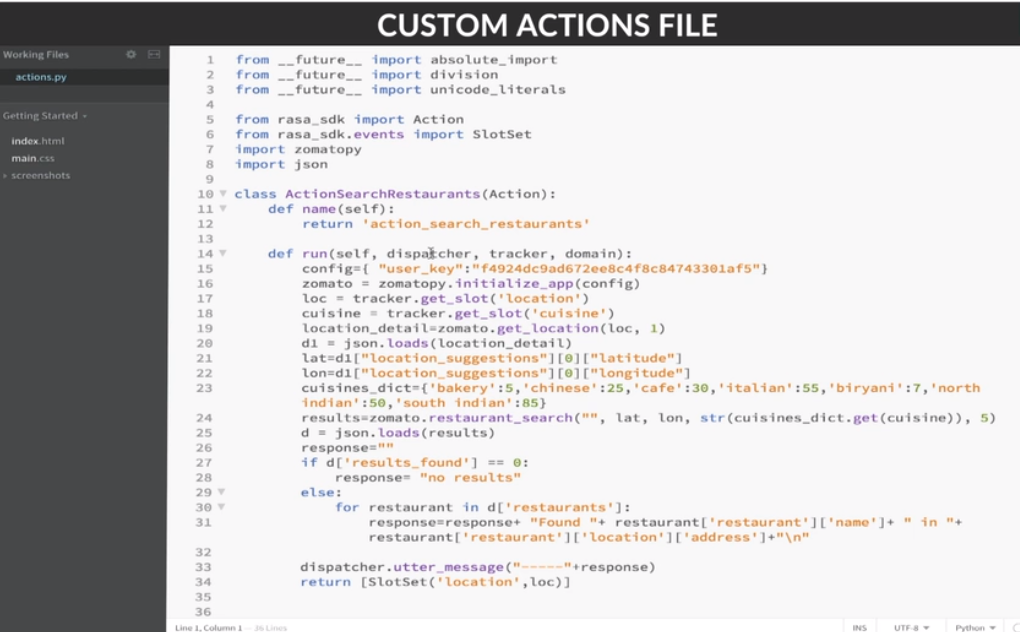

Actions: There are two types of actions a bot can take:

Utterance action: The bot just sends a text message to the user. For example: replying with a greet message, asking the location, etc

Custom actions: Actions such as querying the database, sending emails to the user, etc. If you want the bot to perform a custom action, you need to add that action in your domain file as well.

 

You can go here (https://rasa.com/docs/rasa/core/actions/#custom-actions) to read more on how to define custom actions.

## Querying the Zomato API

Note that you will need to get your unique access key to use the zomatopy API. You can generate an API key from here (https://developers.zomato.com/api?lang=tr)(max 1000 API calls/day).

 

Once you generate the API key, you can query the API using the zomatopy module. The following sample code shows how to get a restaurant list for a particular location and cuisine, try playing with it after getting your access key:




In [ ]:
# sample code to fetch a list of restaurants using zomatopy

import pprint, json
import zomatopy

### specify location and cuisine
loc = 'Bangalore'
cuisine = 'Italian'

# provide API key and initialise a 'zomato app' object
config={ "user_key": your_api_key_as_a_string_here}
zomato = zomatopy.initialize_app(config)

### get_location gets the lat-long coordinates of 'loc'
location_detail=zomato.get_location(loc, 1)

### store retrieved data as a dict
d1 = json.loads(location_detail)

### separate lat-long coordinates
lat=d1["location_suggestions"][0]["latitude"]
lon=d1["location_suggestions"][0]["longitude"]

### cuisines code (used by zomatopy)
cuisines_dict={'bakery':5,'chinese':25,'cafe':30,'italian':55,'biryani':7,'north indian':50,'south indian':85}

### fetch and print results
results=zomato.restaurant_search("", lat, lon, str(cuisines_dict.get(cuisine)), 5)
d = json.loads(results)
pprint.pprint(d)

Now you are ready to train the dialogue management model using stories. In the next segment, you'll see how to do that.